

```
# This is formatted as code
```

Load Keggle Data

In [0]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tobiaswinterhoff","key":"73d2aa068f98e7c3a7623775ff70b48b"}'}

In [0]:
!ls -lha kaggle.json #make sure the kaggle.json file is present

-rw-r--r-- 1 root root 72 May 10 14:23 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
 # The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          63817  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10           1572  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           7776  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39            165  
doaaalsenani/usa-cers-dataset                               US C

In [0]:
 !kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge
!ls

 99% 1.69G/1.70G [00:10<00:00, 148MB/s]
100% 1.70G/1.70G [00:10<00:00, 181MB/s]
CORD-19-research-challenge.zip	drive  kaggle.json  sample_data


In [0]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input'

In [0]:
!unzip /content/CORD-19-research-challenge.zip -d '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180654.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180657.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180659.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180660.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180661.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180663.xml.json  
  inflating: /content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pmc_json/PMC7180664.xml.json  
  inflating: /content/drive/My D

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [112]:
 # mount the drive (if not already did)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
root_path = '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


In [0]:
f        = open("/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/all_filtered_json.txt","rb")
lines    = f.readlines()
sub_json = []
for line in lines:
  line = line.decode("utf-8")
  line = line.strip("\n")
  line = line.strip("\t")
  line = "/content" + line
  sub_json.append(line)

In [115]:
print(sub_json)

['/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pdf_json/d5cd67586cce346312cd5671aaae441227983075.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/comm_use_subset/comm_use_subset/pdf_json/82e33ea1413ab8560304175a8281348a156c2e47.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/comm_use_subset/comm_use_subset/pdf_json/06589343cb2fcc62a39c587071c8a9e76836f993.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pdf_json/1dbdb89edb0d40d542d73c57024777330ed16f55.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pdf_json/3ebf58978acf7f2ad80813af0943926f20766c15.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pdf_json/466fcea3e4725a13c1ad1ed64a39962601725030.json', '/content/drive/My Drive/Colab Notebooks/DSLS/week3/input/custom_license/custom_license/pdf_json/49d2420cdc9347be2c92e1ed714b

In [7]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59887 entries, 0 to 59886
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cord_uid                     59887 non-null  object
 1   sha                          45763 non-null  object
 2   source_x                     59887 non-null  object
 3   title                        59724 non-null  object
 4   doi                          55801 non-null  object
 5   pmcid                        48139 non-null  object
 6   pubmed_id                    41328 non-null  object
 7   license                      59887 non-null  object
 8   abstract                     48757 non-null  object
 9   publish_time                 59879 non-null  object
 10  authors                      57296 non-null  object
 11  journal                      52828 non-null  object
 12  Microsoft Academic Paper ID  964 non-null    object
 13  WHO #Covidence               17

In [0]:
 class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)

    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
#first_row = FileReader(sub_json[1])
#print(first_row)

In [0]:
 def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data
    

In [0]:
all_json = sub_json

In [11]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 145
Processing index: 14 of 145
Processing index: 28 of 145
Processing index: 42 of 145
Processing index: 56 of 145
Processing index: 70 of 145
Processing index: 84 of 145
Processing index: 98 of 145
Processing index: 112 of 145
Processing index: 126 of 145
Processing index: 140 of 145


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,d5cd67586cce346312cd5671aaae441227983075,10.1007/978-981-10-5287-3_2,The movement of individuals living in groups l...,the environment cannot physically support such...,"Gorochowski, Thomas E.. Richardson, Thomas O.",How Behaviour and the Environment Influence<b...,Temporal Network Epidemiology,The movement of individuals living in groups<...
1,82e33ea1413ab8560304175a8281348a156c2e47,10.1186/s12879-016-2003-3,Background: The homogeneous mixing assumption ...,spatial spread of the epidemic and of the effe...,"Bioglio, Livio. Génois, Mathieu. <br>Vesterg...",Recalibrating disease parameters for<br>incre...,BMC Infect Dis,Background: The homogeneous mixing<br>assumpt...
2,06589343cb2fcc62a39c587071c8a9e76836f993,10.1186/1471-2334-11-199,Background: The transmission of infectious dis...,"Since the beginning of the new millennium, epi...","Yang, Yong. Atkinson, Peter M. Ettema, Dick",Analysis of CDC social control measures using...,BMC Infect Dis,Background: The transmission of infectious<br...
3,1dbdb89edb0d40d542d73c57024777330ed16f55,10.1097/phh.0b013e3181ce594e,Background-There remains substantial debate ov...,The recent and ongoing 2009 H1N1 influenza pan...,"Lee, Bruce Y.. Brown, Shawn T.. Cooley, Phi...",Simulating School Closure Strategies to<br>Mi...,Journal of Public Health Management and Practice,Background-There remains substantial debate<b...
4,3ebf58978acf7f2ad80813af0943926f20766c15,10.1007/s10588-008-9027-1,A strain-specific vaccine is unlikely to be av...,The latest avian influenza classified as H5N1 ...,"Mniszewski, S. M.. Del Valle, S. Y.. Stroud...",Pandemic simulation of antivirals + school<br...,Comput Math Organ Theory,A strain-specific vaccine is unlikely to be<b...


In [12]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,d5cd67586cce346312cd5671aaae441227983075,10.1007/978-981-10-5287-3_2,The movement of individuals living in groups l...,the environment cannot physically support such...,"Gorochowski, Thomas E.. Richardson, Thomas O.",How Behaviour and the Environment Influence<b...,Temporal Network Epidemiology,The movement of individuals living in groups<...,722,6778,1824
1,82e33ea1413ab8560304175a8281348a156c2e47,10.1186/s12879-016-2003-3,Background: The homogeneous mixing assumption ...,spatial spread of the epidemic and of the effe...,"Bioglio, Livio. Génois, Mathieu. <br>Vesterg...",Recalibrating disease parameters for<br>incre...,BMC Infect Dis,Background: The homogeneous mixing<br>assumpt...,347,7290,1696
2,06589343cb2fcc62a39c587071c8a9e76836f993,10.1186/1471-2334-11-199,Background: The transmission of infectious dis...,"Since the beginning of the new millennium, epi...","Yang, Yong. Atkinson, Peter M. Ettema, Dick",Analysis of CDC social control measures using...,BMC Infect Dis,Background: The transmission of infectious<br...,313,4482,1386
3,1dbdb89edb0d40d542d73c57024777330ed16f55,10.1097/phh.0b013e3181ce594e,Background-There remains substantial debate ov...,The recent and ongoing 2009 H1N1 influenza pan...,"Lee, Bruce Y.. Brown, Shawn T.. Cooley, Phi...",Simulating School Closure Strategies to<br>Mi...,Journal of Public Health Management and Practice,Background-There remains substantial debate<b...,243,4476,1441
4,3ebf58978acf7f2ad80813af0943926f20766c15,10.1007/s10588-008-9027-1,A strain-specific vaccine is unlikely to be av...,The latest avian influenza classified as H5N1 ...,"Mniszewski, S. M.. Del Valle, S. Y.. Stroud...",Pandemic simulation of antivirals + school<br...,Comput Math Organ Theory,A strain-specific vaccine is unlikely to be<b...,172,4201,1355


In [13]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             145 non-null    object
 1   doi                  143 non-null    object
 2   abstract             145 non-null    object
 3   body_text            145 non-null    object
 4   authors              145 non-null    object
 5   title                145 non-null    object
 6   journal              133 non-null    object
 7   abstract_summary     145 non-null    object
 8   abstract_word_count  145 non-null    int64 
 9   body_word_count      145 non-null    int64 
 10  body_unique_words    145 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 12.6+ KB


In [14]:
df_covid['abstract'].describe(include='all')

count     145
unique    128
top          
freq       18
Name: abstract, dtype: object

In [15]:
df_covid.describe()

,abstract_word_count,body_word_count,body_unique_words
count,145.000000,145.000000,145.000000
mean,198.675862,3671.758621,1143.489655
std,134.758523,2077.430234,471.929228
min,0.000000,398.000000,216.000000
25%,116.000000,2213.000000,840.000000
50%,200.000000,3429.000000,1152.000000
75%,257.000000,4540.000000,1433.000000
max,758.000000,10194.000000,2782.000000


In [0]:
df_ourcsv = pd.read_pickle("/content/drive/My Drive/DataScience/all_filtered_papers.p")

In [17]:
df_covid

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,d5cd67586cce346312cd5671aaae441227983075,10.1007/978-981-10-5287-3_2,The movement of individuals living in groups l...,the environment cannot physically support such...,"Gorochowski, Thomas E.. Richardson, Thomas O.",How Behaviour and the Environment Influence<b...,Temporal Network Epidemiology,The movement of individuals living in groups<...,722,6778,1824
1,82e33ea1413ab8560304175a8281348a156c2e47,10.1186/s12879-016-2003-3,Background: The homogeneous mixing assumption ...,spatial spread of the epidemic and of the effe...,"Bioglio, Livio. Génois, Mathieu. <br>Vesterg...",Recalibrating disease parameters for<br>incre...,BMC Infect Dis,Background: The homogeneous mixing<br>assumpt...,347,7290,1696
2,06589343cb2fcc62a39c587071c8a9e76836f993,10.1186/1471-2334-11-199,Background: The transmission of infectious dis...,"Since the beginning of the new millennium, epi...","Yang, Yong. Atkinson, Peter M. Ettema, Dick",Analysis of CDC social control measures using...,BMC Infect Dis,Background: The transmission of infectious<br...,313,4482,1386
3,1dbdb89edb0d40d542d73c57024777330ed16f55,10.1097/phh.0b013e3181ce594e,Background-There remains substantial debate ov...,The recent and ongoing 2009 H1N1 influenza pan...,"Lee, Bruce Y.. Brown, Shawn T.. Cooley, Phi...",Simulating School Closure Strategies to<br>Mi...,Journal of Public Health Management and Practice,Background-There remains substantial debate<b...,243,4476,1441
4,3ebf58978acf7f2ad80813af0943926f20766c15,10.1007/s10588-008-9027-1,A strain-specific vaccine is unlikely to be av...,The latest avian influenza classified as H5N1 ...,"Mniszewski, S. M.. Del Valle, S. Y.. Stroud...",Pandemic simulation of antivirals + school<br...,Comput Math Organ Theory,A strain-specific vaccine is unlikely to be<b...,172,4201,1355
...,...,...,...,...,...,...,...,...,...,...,...
140,4b36607cdbc54f8006161a9a1839489dd0a51269,10.1093/inthealth/ihaa001,Background: Strategies are urgently needed to ...,Emerging and re-emerging zoonotic diseases are...,"Li, Hong-Ying. Zhu, Guang-Jian. Zhang,<br>Y...",A qualitative study of zoonotic risk factors<...,Int Health,Background: Strategies are urgently needed to...,191,3318,1352
141,7ac7d0598008bf62e00164cd4fe4a04324d34563,10.1101/2020.04.05.20054155,Background: Whether cardiovascular disease (CV...,Cases of coronavirus disease 2019 (COVID-19) a...,Kunihiro Matsushita. Ning Ding. Minghao Kou...,The relationship of COVID-19 severity with<br...,NaN,Background: Whether cardiovascular disease<br...,282,3261,964
142,54cfc3c68e1e4832fee5b3294e5673e37978ebdf,10.1101/2020.02.28.20028514,Corona virus disease 2019 has rapidly become t...,"The corona virus disease 2019 ( COVID- 19) , a...",Lu Li. Shuang Li. Manman Xu. Pengfei Yu. ...,Risk factors related to hepatic injury in<br>...,NaN,Corona virus disease 2019 has rapidly become<...,233,2353,701
143,62d68fb65591e60de58891c42f5a1457b9654603,10.1101/2020.03.24.20040162,The World Health Organization (WHO) has recent...,Diagnosis of COVID-19 was made according to Wo...,Yi Han. Haidong Zhang. Sucheng Mu. Wei Wei...,"Lactate dehydrogenase, a Risk Factor of Sever...",NaN,The World Health Organization (WHO) has<br>re...,295,2991,911


In [0]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)

In [19]:
df_covid['abstract'].describe(include='all')

count     145
unique    128
top          
freq       18
Name: abstract, dtype: object

In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string 
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['beside',
 'him',
 'hereafter',
 'do',
 'being',
 'between',
 'could',
 'front',
 'former',
 'without']

In [0]:
 custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [0]:
# Download the spacy bio parser
from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [0]:
import en_core_sci_lg  # model downloaded in previous step

In [0]:
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [0]:
df = df_covid

from tqdm import tqdm


In [26]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

100%|██████████| 145/145 [00:47<00:00,  3.03it/s]


In [0]:


from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X



In [28]:
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(145, 4096)

#PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(145, 122)

In [30]:
X_reduced

array([[ 0.25339192,  0.0770655 , -0.10553266, ..., -0.01805139,
        -0.04557267, -0.01112824],
       [ 0.42594366, -0.00133117, -0.10554985, ...,  0.01796713,
         0.04436378,  0.04803085],
       [ 0.3080932 , -0.05158317, -0.08766669, ..., -0.04517039,
         0.12551858,  0.04593973],
       ...,
       [-0.22736459, -0.27366196,  0.21017073, ..., -0.060283  ,
         0.04007827, -0.04196623],
       [-0.20315554, -0.26451352,  0.12251133, ...,  0.06311887,
         0.01531711, -0.00943292],
       [-0.07979741, -0.28788105,  0.39655294, ..., -0.07318217,
        -0.04291269,  0.02831181]])

#DETERMINE K SILOUETTE SCORE VS DISTORTION (DISTORTION)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist


In [0]:

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

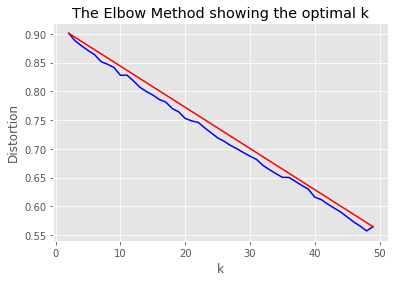

In [37]:


X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [33]:
K = range(2, 50)
scores_silhouette = []
for k in K:    
  clusterer = KMeans(n_clusters=k,random_state=42)
  preds     = clusterer.fit_predict(X_reduced)
  centers   = clusterer.cluster_centers_
  score = silhouette_score(X_reduced, preds)
  print("For n_clusters = {}, silhouette score is {})".format(k, score))
  scores_silhouette.append(score)

For n_clusters = 2, silhouette score is 0.03277729427108708)
For n_clusters = 3, silhouette score is 0.03645304496214433)
For n_clusters = 4, silhouette score is 0.03843169257711265)
For n_clusters = 5, silhouette score is 0.03544411323995933)
For n_clusters = 6, silhouette score is 0.0367899950614389)
For n_clusters = 7, silhouette score is 0.0274320892851914)
For n_clusters = 8, silhouette score is 0.032638348902203344)
For n_clusters = 9, silhouette score is 0.022103627068655034)
For n_clusters = 10, silhouette score is 0.01989329133625777)
For n_clusters = 11, silhouette score is 0.03571711687518235)
For n_clusters = 12, silhouette score is 0.035038788282558644)
For n_clusters = 13, silhouette score is 0.03422593684922838)
For n_clusters = 14, silhouette score is 0.031169713366196353)
For n_clusters = 15, silhouette score is 0.03291345581706844)
For n_clusters = 16, silhouette score is 0.03162877439707632)
For n_clusters = 17, silhouette score is 0.03655788198891938)
For n_clusters

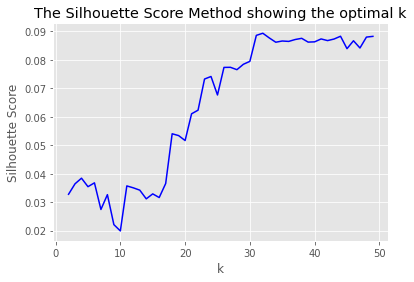

In [34]:

# Plot the elbow
plt.plot(K, scores_silhouette, 'b-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score Method showing the optimal k')
plt.show()

In [0]:
#DETERMINE K SILLOUETTHE SCORE VS DISTORTION (COSINE SIMILIARITY)

In [0]:
X_unit = X_reduced
length = np.sqrt((X_unit**2).sum(axis=1))[:,None]
X_unit = X_unit / length



In [0]:
# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_unit)
    k_means.fit(X_unit)
    distortions.append(sum(np.min(cdist(X_unit, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

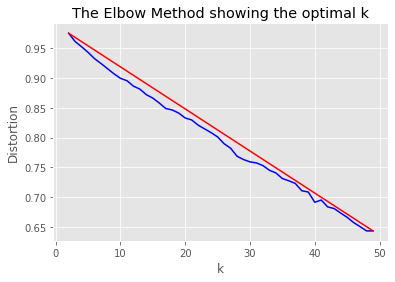

In [37]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [40]:
K = range(2, 50)
scores_silhouette = []
for k in K:    
  clusterer = KMeans(n_clusters=k,random_state=42)
  preds     = clusterer.fit_predict(X_unit)
  centers   = clusterer.cluster_centers_
  score = silhouette_score(X_unit, preds)
  print("For n_clusters = {}, silhouette score is {})".format(k, score))
  scores_silhouette.append(score)

For n_clusters = 2, silhouette score is 0.04230748559623628)
For n_clusters = 3, silhouette score is 0.039659604463481615)
For n_clusters = 4, silhouette score is 0.03904605307342994)
For n_clusters = 5, silhouette score is 0.03848840018592574)
For n_clusters = 6, silhouette score is 0.03406772672953758)
For n_clusters = 7, silhouette score is 0.032242569009245145)
For n_clusters = 8, silhouette score is 0.040948013678928655)
For n_clusters = 9, silhouette score is 0.04307003176703745)
For n_clusters = 10, silhouette score is 0.04489985664205803)
For n_clusters = 11, silhouette score is 0.041461546993100534)
For n_clusters = 12, silhouette score is 0.04469285259252744)
For n_clusters = 13, silhouette score is 0.0436868339244306)
For n_clusters = 14, silhouette score is 0.0495343585516793)
For n_clusters = 15, silhouette score is 0.049543351189495446)
For n_clusters = 16, silhouette score is 0.053246838008068155)
For n_clusters = 17, silhouette score is 0.058314559611909324)
For n_clust

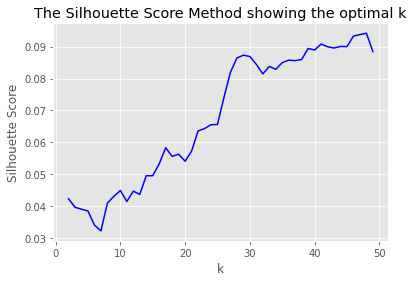

In [41]:
# Plot the elbow
plt.plot(K, scores_silhouette, 'b-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score Method showing the optimal k')
plt.show()

#TSNE VISUALIZATION

In [42]:
 from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())


[t-SNE] Computing 144 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.001s...
[t-SNE] Computed neighbors for 145 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.450058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.173378
[t-SNE] KL divergence after 700 iterations: 0.168239


In [0]:
k = 18
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [0]:
k = 17
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_unit)
df['y'] = y_pred

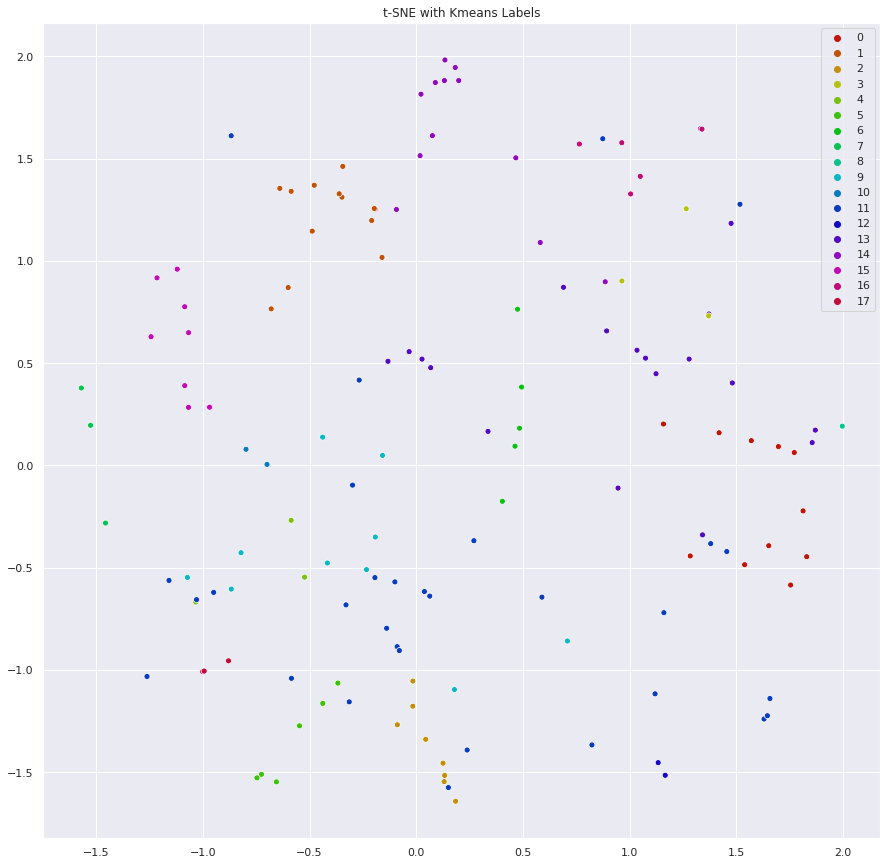

In [48]:
 %matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(k, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

#KEYWORD EXTRACTION

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
 vectorizers = []
    
for ii in range(0, k):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [67]:
vectorizers[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [68]:
 vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

Not enough instances in cluster: 3
Not enough instances in cluster: 4
Not enough instances in cluster: 6
Not enough instances in cluster: 7
Not enough instances in cluster: 8
Not enough instances in cluster: 10
Not enough instances in cluster: 12
Not enough instances in cluster: 17


In [69]:
 # number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 10

lda_models = []
for ii in range(0, k):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [70]:
 LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [0]:
 clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [0]:
 # Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [0]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [77]:
len(all_keywords)

10

In [83]:
print(df["y"].value_counts())

11    31
13    18
1     13
14    12
0     11
9     10
15     8
2      8
16     6
5      6
6      5
4      3
3      3
17     3
7      3
10     2
12     2
8      1
Name: y, dtype: int64


In [86]:
all_keywords[0][:10]

['sars',
 'set',
 'gene',
 'rate',
 'orf',
 'recombination',
 'datum',
 'frequency',
 'region',
 'distance']

In [87]:
all_keywords[1][:10]

['symptom',
 'hospital',
 'sars-cov-',
 'china',
 'country',
 'mortality',
 'use',
 'respiratory',
 'risk',
 'evidence']

In [88]:
all_keywords[2][:10]

['community',
 'degree',
 'threshold',
 'mix',
 'heterogeneity',
 'group',
 'node',
 'use',
 'transmission',
 'size']

In [89]:
#3=5
all_keywords[3][:10]

['mix',
 'wave',
 'estimate',
 'outbreak',
 'total',
 'community',
 'human',
 'delay',
 'overall',
 'additional']

In [92]:
#4=9
all_keywords[4][:10]

['case',
 'disease',
 'outbreak',
 'estimate',
 'influenza',
 'process',
 'interval',
 'forecast',
 'day',
 'peak']

In [93]:
#5=11
all_keywords[5][:10]

['parameter',
 'sequence',
 'disease',
 'method',
 'change',
 'city',
 'spread',
 'network',
 'value',
 'interaction']

In [94]:
#6=13
all_keywords[6][:10]

['case',
 'camel',
 'sars-cov-',
 'human',
 'protein',
 'isolate',
 'healthcare',
 'bat',
 'viral',
 'sars-cov']

In [95]:
#7=14
all_keywords[7][:10]

['sars',
 'sample',
 'lung',
 'serum',
 'finding',
 'detection',
 'virus',
 'care',
 'study',
 'swab']

In [97]:
#8=15
all_keywords[8][:10]

['rate',
 'risk',
 'model',
 'outbreak',
 'death',
 'datum',
 'day',
 'virus',
 'state',
 'patient']

In [96]:
#9=16
all_keywords[9][:10]

['pcr',
 'rsv',
 'sequence',
 'pneumonia',
 'age',
 'child',
 'rhinovirus',
 'associate',
 'young',
 'presence']

In [98]:
all_keywords

[['sars',
  'set',
  'gene',
  'rate',
  'orf',
  'recombination',
  'datum',
  'frequency',
  'region',
  'distance',
  'time',
  'tree',
  'protein',
  'organism',
  'dna',
  'select',
  'representation',
  'acid',
  'coronavirus',
  'human',
  'phylogenetic',
  'strain',
  'model',
  'genomic',
  'complete'],
 ['symptom',
  'hospital',
  'sars-cov-',
  'china',
  'country',
  'mortality',
  'use',
  'respiratory',
  'risk',
  'evidence',
  'angiotensin',
  'comorbidity',
  'cell',
  'lung',
  'care',
  'health',
  'sars-cov',
  'death',
  'infection',
  'treatment',
  'factor',
  'outcome',
  'associate'],
 ['community',
  'degree',
  'threshold',
  'mix',
  'heterogeneity',
  'group',
  'node',
  'use',
  'transmission',
  'size',
  'individual',
  'infectious',
  'homogeneous'],
 ['mix',
  'wave',
  'estimate',
  'outbreak',
  'total',
  'community',
  'human',
  'delay',
  'overall',
  'additional',
  'current',
  'potential',
  'particular',
  'design',
  'develope',
  'help',
 

#WORDCLOUD

In [0]:
liste = [['sars',
  'set',
  'gene',
  'rate',
  'orf',
  'recombination',
  'datum',
  'frequency',
  'region',
  'distance',
  'time',
  'tree',
  'protein',
  'organism',
  'dna',
  'select',
  'representation',
  'acid',
  'coronavirus',
  'human',
  'phylogenetic',
  'strain',
  'model',
  'genomic',
  'complete'],
 ['symptom',
  'hospital',
  'sars-cov-',
  'china',
  'country',
  'mortality',
  'use',
  'respiratory',
  'risk',
  'evidence',
  'angiotensin',
  'comorbidity',
  'cell',
  'lung',
  'care',
  'health',
  'sars-cov',
  'death',
  'infection',
  'treatment',
  'factor',
  'outcome',
  'associate'],
 ['community',
  'degree',
  'threshold',
  'mix',
  'heterogeneity',
  'group',
  'node',
  'use',
  'transmission',
  'size',
  'individual',
  'infectious',
  'homogeneous'],
 ['mix',
  'wave',
  'estimate',
  'outbreak',
  'total',
  'community',
  'human',
  'delay',
  'overall',
  'additional',
  'current',
  'potential',
  'particular',
  'design',
  'develope',
  'help',
  'fraction',
  'synthetic',
  'affect'],
 ['case',
  'disease',
  'outbreak',
  'estimate',
  'influenza',
  'process',
  'interval',
  'forecast',
  'day',
  'peak',
  'pandemic',
  'base',
  'virus',
  'epidemic',
  'approach',
  'simulation'],
 ['parameter',
  'sequence',
  'disease',
  'method',
  'change',
  'city',
  'spread',
  'network',
  'value',
  'interaction',
  'virus',
  'respiratory',
  'vaccine',
  'algorithm',
  'prediction',
  'tool',
  'transmission',
  'forecast',
  'datum',
  'probability',
  'individual'],
 ['case',
  'camel',
  'sars-cov-',
  'human',
  'protein',
  'isolate',
  'healthcare',
  'bat',
  'viral',
  'sars-cov',
  'variant',
  'sample',
  'sequence',
  'animal',
  'area',
  'group',
  'influenza',
  'genome',
  'patient',
  'mers-cov',
  'comorbidity',
  'assay',
  'sensitivity'],
 ['sars',
  'sample',
  'lung',
  'serum',
  'finding',
  'detection',
  'virus',
  'care',
  'study',
  'swab',
  'test',
  'group',
  'pulmonary',
  'viral',
  'scan',
  'symptom',
  'consolidation',
  'identification',
  'inform',
  'year'],
 ['rate',
  'risk',
  'model',
  'outbreak',
  'death',
  'datum',
  'day',
  'virus',
  'state',
  'patient',
  'severe',
  'level',
  'age',
  'infect',
  'international',
  'peer-reviewed',
  'recent',
  'previous',
  'chinese',
  'far'],
 ['pcr',
  'rsv',
  'sequence',
  'pneumonia',
  'age',
  'child',
  'rhinovirus',
  'associate',
  'young',
  'presence',
  'large',
  'clinical',
  'molecular',
  'sensitivity',
  'hospital',
  'infect',
  'antigen',
  'polymerase',
  'contrast',
  'assay']]

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ""
for i in liste:
  for j in i:
    text = text + " " + j




In [103]:
text

' sars set gene rate orf recombination datum frequency region distance time tree protein organism dna select representation acid coronavirus human phylogenetic strain model genomic complete symptom hospital sars-cov- china country mortality use respiratory risk evidence angiotensin comorbidity cell lung care health sars-cov death infection treatment factor outcome associate community degree threshold mix heterogeneity group node use transmission size individual infectious homogeneous mix wave estimate outbreak total community human delay overall additional current potential particular design develope help fraction synthetic affect case disease outbreak estimate influenza process interval forecast day peak pandemic base virus epidemic approach simulation parameter sequence disease method change city spread network value interaction virus respiratory vaccine algorithm prediction tool transmission forecast datum probability individual case camel sars-cov- human protein isolate healthcare 

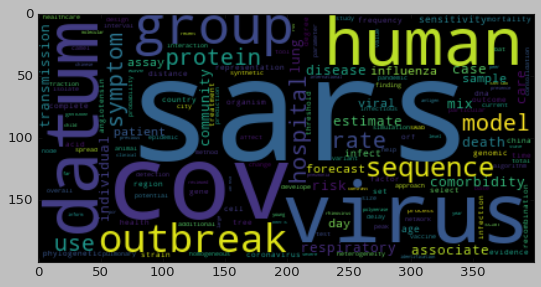

<Figure size 1600x1200 with 0 Axes>

In [110]:
plt.style.use('classic')
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
from matplotlib.pyplot import figure
plt.imshow(wordcloud, interpolation="bilinear")

plt.figure(figsize=(20,15))
plt.show()